In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
dataset = pd.read_csv('/content/WineQT.csv')

print(dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [ ]:
X = dataset.drop('quality', axis=1)
y = dataset['quality']

# Scale the features
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define and Train Baseline Models

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=3000, solver="lbfgs", random_state=42)
log_reg.fit(X_train_scaled, y_train)



# Predict without warnings
y_pred_log = log_reg.predict(X_val_scaled)


# Accuracy
log_acc = accuracy_score(y_val, y_pred_log)
print(f"Logistic Regression Accuracy: {log_acc:.3f}")


Logistic Regression Accuracy: 0.661


In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_clf.predict(X_val)

# Accuracy
tree_acc = accuracy_score(y_val, y_pred_tree)
print(f"Decision Tree Accuracy: {tree_acc:.3f}")

Decision Tree Accuracy: 0.649


In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_clf.predict(X_val)

# Accuracy
knn_acc = accuracy_score(y_val, y_pred_knn)
print(f"KNN Accuracy: {knn_acc:.3f}")


KNN Accuracy: 0.538


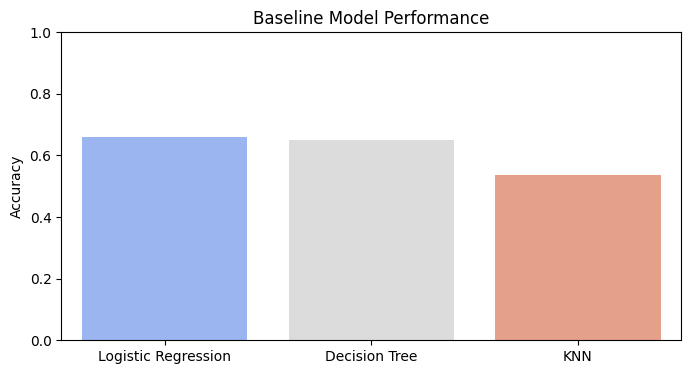

In [ ]:
# Store results
models = ["Logistic Regression", "Decision Tree", "KNN"]
accuracies = [log_acc, tree_acc, knn_acc]

# Plot results
plt.figure(figsize=(8, 4))
sns.barplot(x=models, y=accuracies)
sns.barplot(x=models, y=accuracies, hue=models, legend=False, palette="coolwarm")
plt.ylabel("Accuracy")
plt.title("Baseline Model Performance")
plt.ylim(0, 1)
plt.show()